In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt

In [136]:
pths = ['./CentralBank.deposit.json', './Roulette.place_bet.json', './ChuckALuck.play.json']
data = []

for pth in pths:
  with open(pth, 'r') as f:
    string = f.read()
    jsondata = json.loads(string)
    data.append(np.array(jsondata['results']))
    if 'vrfResults' in jsondata:
      data.append(np.array(jsondata['vrfResults']))
    #print(f'{pth}: {results.mean()} +- {results.std()}')

data = np.array(data)

In [163]:
df = pd.DataFrame(data=data.transpose() / 1000, columns=['CentralBank - Deposit', 'Roulette - Place Bet', 'Dice - Start', 'Dice - Complete'])
df = df.melt(var_name='Transaction Type')
df = df.rename(columns={'value': 'Time (s)'})

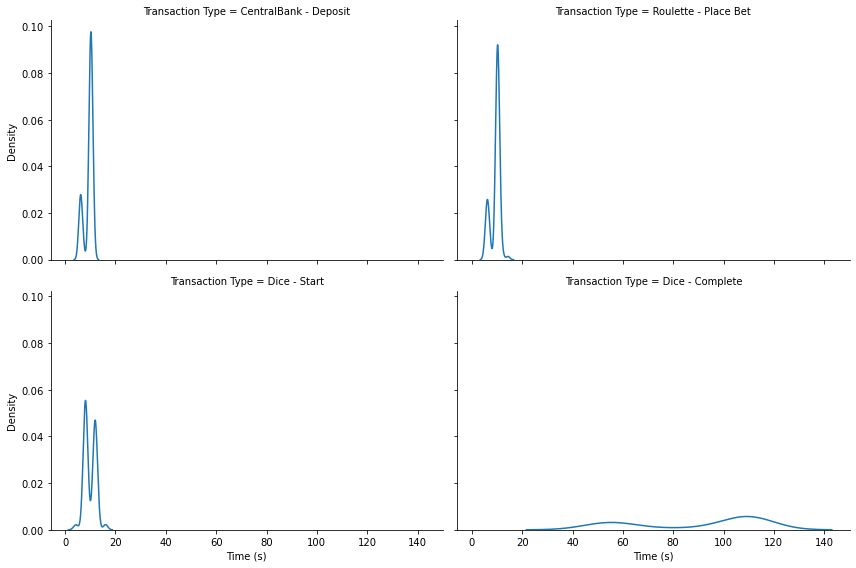

In [172]:
chart = sns.displot(df, x='Time (s)', col='Transaction Type', col_wrap=2, kind='kde', aspect=1.5, height=4)